# SOLUTIONS: Data from a Periodic Star

Now that we have used 3 different techniques to find models to fit our Hubble data, let us now turn our attention to a different data set - that of a periodic star.

Below are lightcurve magnitudes for this source over a period of 4 months. Magnitude is an odd astronomy unit. It is a measure of brightness, which actually doesn't have any units, and lower magnitude indicates that an object is actually brighter!

Now let's use what we learned in the previous section and apply it to this new dataset.

In [1]:
# Packages to import
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit

In [2]:
day = np.arange(0, 120, 6) #days
mag = np.asarray([9.2, 9.3, 9.7, 9.9, 9.6, 9.8, 9.9, 9.7, 9.1, 8.8, 8.7, 8.3, 8.6, 9.1, 9.1, 9.2, 9.5, 9.9, 9.7, 9.7]) #magnitudes

**Exercise:** Plot the data, and try to fit a cosine function to the data. Does this model fit the data well. Justify your answer?

**Remember:** Low magnitude values are brighter than high magnitude values. Invert your y-axis.

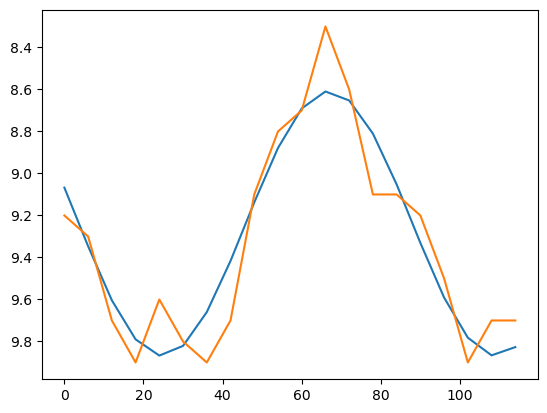

In [11]:
# Answer here
def cos_model(x, A, f, phase, C):
    return A * np.cos(f *x + phase) + C

params, _ = curve_fit(cos_model, day, mag)
A_m, f_m, phase_m, C_m = params


plt.plot(day, A_m * np.cos(f_m * day + phase_m) + C_m)
plt.gca().invert_yaxis()


In [13]:
mag_fitted = A_m * np.cos(f_m * day + phase_m) + C_m

SSres = ((mag - mag_fitted)**2).sum()
ybar = mag.sum() / len(mag)
SStot = ((mag - ybar)**2).sum()
R2 = 1 - SSres / SStot
R2

0.8778313229642708

You will see that the cosine function doesn't fit the data well.

**Exercise:** Find a polynomial model that describes the data. Which degree describes the data well without overfitting? Make a plot of the data with the model you have chosen.

**Hint:** Overfitting is really easy to do...you can keep increasing the polynomial degree to find a curve that exactly fits the data. But this is not what you want. You want a curve that generally describes the data. So instead loop over 10 degrees, and make a plot of degree against R$^2$ and find the degree value where the curve 'turn over'. i.e. at which value do you stop seeing major changes to the R$^2$ value.



0 0.0
1 0.009079104446352626
2 0.2380659380366168
3 0.5487653663214251
4 0.7798405486248726
5 0.8649633574398029
6 0.8881360932905908
7 0.8965896835389362
8 0.9039517203888205
9 0.91214097349149


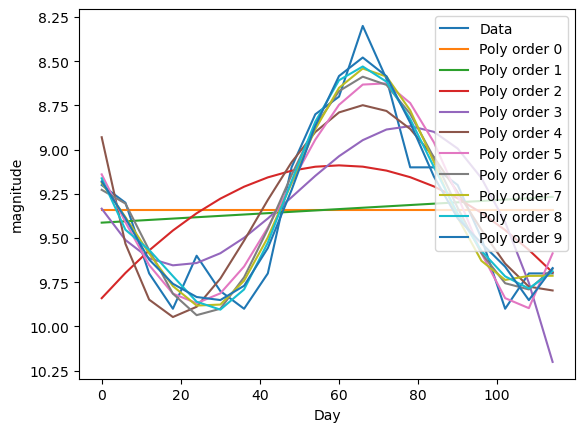

In [17]:
# Answer here
plt.plot()
plt.plot(day, mag, label='Data')
for i in range(10):
    pol = np.polyfit(day, mag, i)
    model = np.poly1d(pol)
    y_value_model = model(day)
    plt.plot(day, y_value_model, label=f'Poly order {i}')

    SSres = ((mag - y_value_model)**2).sum()
    ybar = mag.sum() / len(mag)
    SStot = ((mag - ybar)**2).sum()
    R2 = 1 - SSres / SStot
    print(i, R2)
plt.xlabel('Day')
plt.ylabel('magnitude')
plt.gca().invert_yaxis()
plt.legend()

In [3]:
# Answer here

We see here that the polynomial model fits the data better than the cosine model. But the data only really shows around one period of the star. Below we provide the next 100 days of the periodic star. Does this polynomial still fit the data?

In [18]:
day_all = np.arange(0, 220, 6) #days
mag_all = np.asarray([9.2, 9.3, 9.7, 9.9, 9.6, 9.8, 9.9, 9.7, 9.1, 8.8, 8.7, 8.3, 8.6, 9.0, 9.1, 9.2, 9.5, 9.9, 9.7, 9.7, 9.8, 9.6, 9.1, 8.7, 8.7, 8.4, 8.6, 9.1, 9.1, 9.2, 9.4, 9.9, 9.7, 9.8, 9.7, 9.6, 9.2]) #magnitudes

0 3.3306690738754696e-16
1 0.00010807736063744855
2 0.10643593757299608
3 0.10822438143294244
4 0.10846160706038033
5 0.11229731603680615
6 0.6219521397623541
7 0.6296351095049093
8 0.8719854472432395
9 0.8726472041093121


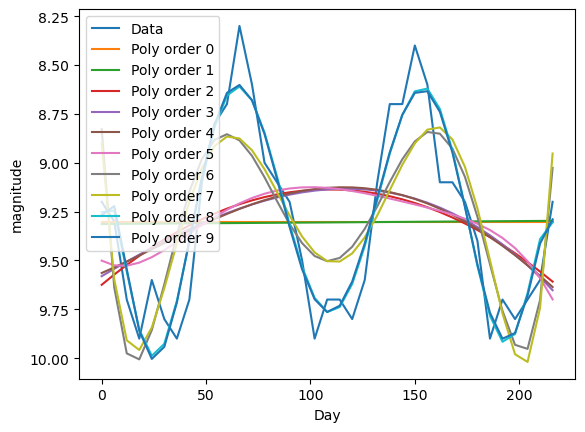

In [19]:
# Answer here
# Answer here
plt.plot()
plt.plot(day_all, mag_all, label='Data')
for i in range(10):
    pol = np.polyfit(day_all, mag_all, i)
    model = np.poly1d(pol)
    y_value_model = model(day_all)
    plt.plot(day_all, y_value_model, label=f'Poly order {i}')

    SSres = ((mag_all - y_value_model)**2).sum()
    ybar = mag_all.sum() / len(mag_all)
    SStot = ((mag_all - ybar)**2).sum()
    R2 = 1 - SSres / SStot
    print(i, R2)
plt.xlabel('Day')
plt.ylabel('magnitude')
plt.gca().invert_yaxis()
plt.legend()

**Exercise:** Find a model which best fits this periodic data

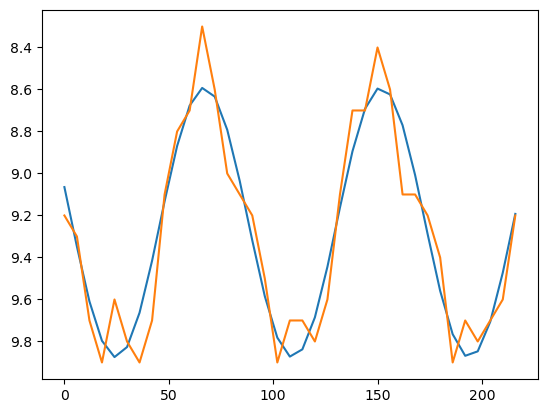

In [26]:
# Answer here
def cos_model(x, A, f, phase, C):
    return A * np.cos(f *x + phase) + C

# curve_fit isn't perfect, this didn't work without the p0 kwarg,
params, _ = curve_fit(cos_model, day, mag)
params, _ = curve_fit(cos_model, day_all, mag_all, p0=params)
A_m, f_m, phase_m, C_m = params


plt.plot(day_all, A_m * np.cos(f_m * day_all + phase_m) + C_m)
plt.plot(day_all, mag_all)
plt.gca().invert_yaxis()
